In [2]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns

In [3]:
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS
import nltk
from konlpy.tag import Twitter
t = Twitter()

In [5]:
# 네이버 웹툰 리뷰가 저장된 파일을 읽는다.
review = open('./review.txt', encoding='utf-8').read()
review

'늦...... 었... 겠 지?????\n기계는 맞아야한다.\n까득 먹여놓고 등산이라니 훼스탈 주시나요\n이런 보상 필요없어\n그런거였나...\n교수님 입이 A당\n옛날에 어떤 사람이 컴퓨터 고치러 갔는데 인터넷 첫 화면이 네이버가 아니라고 고쳐달라 요청 받았다는 썰 기억난다..\n저래놓고 논문 안나오면 재촉하기스킬\n안뽑고 지나가면 잡무들이 요다님 다리 붙잡을 듯\n잡무라길래 교수님마당 잡초뽑기인가..쌀포대나르기인가 했는데 생각보다 더한 잡무들이 있었다..\n진격의 잡무\n아쎄이 식고문 실시\n" 해 줘  "\n??? : 니가 직접 먹고! 판단해.남의 말에 휘둘리지 말고.\n난 니가 줏대있게 인생 살았으면 좋겠어.\n이마에 저건 결속의 문양인가요?\n회사들어가서도 업무 과반이 잡무...\n와 샌....ㅈ....아니...식고문\n뉴진스의 하입보이요\n일병이 일 많이한다고 영원히 이등병하겠다는게 맞나..??\n박교수 보고잇나? \n주제 너무 귀여워..\n뭐지 우리 교수님인가???\nㅋㅋㅋ 눈사람님 잡무도 동글동글해 ㅋㅋ 귀엽\n탈출이 자퇴가 아니라 졸업이었어? 야... 이 기만자야.\n전에 연구원? 보고서 입찰 받아서 일하는 곳 알바 갔었는데 원장이 손으로 이면지에 표 그려주면 그거 한글문서 작업하는 일 했었음.. 진짜 오롯이 공부만 하신분..\n학부연구생이었는데...박사과정에게 맥북에 윈도우를 깔라고 지시하는 교수님...\n통신병 이였는데 콘센트 안꽂고 컴퓨터 고장나서 안켜진다던 주임원사님 생각나네요..\n그래도 먹을건 사주시네 ㅋㅋ\n가위, 네임펜에 발달려서 항상 사야함..\n현직박사과정으로 이번내용은 ㄹㅇ개공감..\n간지나긴 한다\n저 모니터 모델이 뭔가요? 거북목 치료에 최고네요\n저런 교수님이면 사람 많이 델구가세요...  그래야지 음식이 뿜빠이 됨\n최신걸 어떻게 싸게 사냐고.....😑😑😑😑\n간접적으로 경험할 수 있음에 ...감사함을...\n투모니터가 간지도 나고 효율적이긴하지\n폴더안에 파일이 들어있는거 보면 신세계 느낌일려나..\n???\n올해

In [6]:
# 한글 형태소 분석을 실행한다.
review_tokens = t.nouns(review)
review_tokens

['늦',
 '기계',
 '득',
 '등산',
 '훼',
 '스탈',
 '보상',
 '교수',
 '입',
 '당',
 '옛날',
 '사람',
 '컴퓨터',
 '인터넷',
 '첫',
 '화면',
 '네이버',
 '달라',
 '요청',
 '논문',
 '재촉',
 '스킬',
 '잡무',
 '요',
 '다리',
 '듯',
 '잡무',
 '길',
 '교수',
 '마당',
 '잡초',
 '뽑기',
 '쌀',
 '포대',
 '기인',
 '생각',
 '잡무',
 '진격',
 '잡무',
 '쎄이',
 '식',
 '고문',
 '실시',
 '해',
 '니',
 '직접',
 '판단',
 '남',
 '말',
 '휘',
 '둘리',
 '난',
 '니',
 '줏대',
 '인생',
 '이마',
 '저건',
 '결속',
 '양',
 '회사',
 '업무',
 '과반',
 '잡무',
 '식',
 '고문',
 '뉴진스',
 '입',
 '보이',
 '일병',
 '일',
 '이등병',
 '박',
 '교수',
 '보고',
 '주제',
 '뭐',
 '우리',
 '교수',
 '눈사람',
 '잡무',
 '동글동글',
 '탈출',
 '자퇴',
 '졸업',
 '이',
 '기만',
 '전',
 '연구원',
 '보고서',
 '입찰',
 '일',
 '곳',
 '알바',
 '원장',
 '손',
 '면지',
 '표',
 '그거',
 '한글',
 '문서',
 '작업',
 '일',
 '진짜',
 '롯',
 '공부',
 '신분',
 '학부',
 '연구생',
 '박사',
 '과정',
 '맥북',
 '윈도우',
 '지시',
 '교수',
 '통신병',
 '콘센트',
 '컴퓨터',
 '고장',
 '주임',
 '원사',
 '가위',
 '임펜',
 '발달',
 '려',
 '항상',
 '함',
 '현직',
 '박사',
 '과정',
 '이번',
 '내용',
 '개',
 '공감',
 '저',
 '모니터',
 '모델',
 '뭔가',
 '거북목',
 '치료',
 '최고',
 '저런',
 '교수',
 '이면',
 '사람',
 '델',
 '가세'

In [9]:
# 불용어를 정의한다.
stop_words = ['달라', '그거', '임펜', '이번', '뭔가', '뿜빠이']
review_tokens = [each_word for each_word in review_tokens if each_word not in stop_words and len(each_word) > 1]
review_tokens

['기계',
 '등산',
 '스탈',
 '보상',
 '교수',
 '옛날',
 '사람',
 '컴퓨터',
 '인터넷',
 '화면',
 '네이버',
 '요청',
 '논문',
 '재촉',
 '스킬',
 '잡무',
 '다리',
 '잡무',
 '교수',
 '마당',
 '잡초',
 '뽑기',
 '포대',
 '기인',
 '생각',
 '잡무',
 '진격',
 '잡무',
 '쎄이',
 '고문',
 '실시',
 '직접',
 '판단',
 '둘리',
 '줏대',
 '인생',
 '이마',
 '저건',
 '결속',
 '회사',
 '업무',
 '과반',
 '잡무',
 '고문',
 '뉴진스',
 '보이',
 '일병',
 '이등병',
 '교수',
 '보고',
 '주제',
 '우리',
 '교수',
 '눈사람',
 '잡무',
 '동글동글',
 '탈출',
 '자퇴',
 '졸업',
 '기만',
 '연구원',
 '보고서',
 '입찰',
 '알바',
 '원장',
 '면지',
 '한글',
 '문서',
 '작업',
 '진짜',
 '공부',
 '신분',
 '학부',
 '연구생',
 '박사',
 '과정',
 '맥북',
 '윈도우',
 '지시',
 '교수',
 '통신병',
 '콘센트',
 '컴퓨터',
 '고장',
 '주임',
 '원사',
 '가위',
 '발달',
 '항상',
 '현직',
 '박사',
 '과정',
 '내용',
 '공감',
 '모니터',
 '모델',
 '거북목',
 '치료',
 '최고',
 '저런',
 '교수',
 '이면',
 '사람',
 '가세',
 '음식',
 '최신',
 '간접',
 '경험',
 '모니터',
 '간지',
 '효율',
 '폴더',
 '파일',
 '신세계',
 '느낌',
 '올해',
 '지도',
 '교수',
 '구년',
 '한해',
 '볼때',
 '오지',
 '연구실',
 '우리',
 '악기',
 '바리',
 '기여',
 '진짜',
 '혼자',
 '재산',
 '여유',
 '컴퓨터',
 '어르신',
 '캬캬캭',
 '학사',
 '잡무',
 '보통',
 '학사',
 '잡무',
 '잡무

In [13]:
# 워드클라우드로 구현할 단어들의 출현 빈도수를 센다.
token = nltk.Text(review_tokens)
token.vocab().most_common(50)

[('교수', 127),
 ('잡무', 127),
 ('진짜', 47),
 ('대학원', 33),
 ('사람', 25),
 ('박사', 23),
 ('대학원생', 21),
 ('우리', 20),
 ('정도', 19),
 ('모니터', 18),
 ('생각', 17),
 ('눈사람', 17),
 ('연구실', 17),
 ('등산', 16),
 ('졸업', 16),
 ('과제', 16),
 ('그냥', 15),
 ('연구', 14),
 ('정리', 14),
 ('과정', 13),
 ('석사', 13),
 ('데이트', 13),
 ('회사', 12),
 ('상관', 12),
 ('제일', 12),
 ('처리', 11),
 ('하나', 11),
 ('표정', 11),
 ('시약', 11),
 ('뿌엉', 11),
 ('정말', 10),
 ('주말', 10),
 ('고문', 9),
 ('실험', 9),
 ('거대', 9),
 ('윤석', 9),
 ('컴퓨터', 8),
 ('보고', 8),
 ('탈출', 8),
 ('학부', 8),
 ('저런', 8),
 ('악기', 8),
 ('혼자', 8),
 ('여기', 8),
 ('라면', 8),
 ('확인', 8),
 ('실험실', 8),
 ('보고서', 7),
 ('바리', 7),
 ('보통', 7)]

In [18]:
# 워드클라우드로 구현할 단어를 뽑아내서 단어를 key로 하고 출현 빈도수를 value로 하는 딕셔너리를 만든다.
data = dict(token.vocab().most_common(250))
data

{'교수': 127,
 '잡무': 127,
 '진짜': 47,
 '대학원': 33,
 '사람': 25,
 '박사': 23,
 '대학원생': 21,
 '우리': 20,
 '정도': 19,
 '모니터': 18,
 '생각': 17,
 '눈사람': 17,
 '연구실': 17,
 '등산': 16,
 '졸업': 16,
 '과제': 16,
 '그냥': 15,
 '연구': 14,
 '정리': 14,
 '과정': 13,
 '석사': 13,
 '데이트': 13,
 '회사': 12,
 '상관': 12,
 '제일': 12,
 '처리': 11,
 '하나': 11,
 '표정': 11,
 '시약': 11,
 '뿌엉': 11,
 '정말': 10,
 '주말': 10,
 '고문': 9,
 '실험': 9,
 '거대': 9,
 '윤석': 9,
 '컴퓨터': 8,
 '보고': 8,
 '탈출': 8,
 '학부': 8,
 '저런': 8,
 '악기': 8,
 '혼자': 8,
 '여기': 8,
 '라면': 8,
 '확인': 8,
 '실험실': 8,
 '보고서': 7,
 '바리': 7,
 '보통': 7,
 '가면': 7,
 '바로': 7,
 '본인': 7,
 '소리': 7,
 '경우': 7,
 '수업': 7,
 '선택': 7,
 '논문': 6,
 '고장': 6,
 '파일': 6,
 '지도': 6,
 '조교': 6,
 '관리': 6,
 '프린터기': 6,
 '오늘': 6,
 '일단': 6,
 '다른': 6,
 '저걸': 6,
 '준비': 6,
 '작가': 6,
 '실화': 6,
 '바탕화면': 6,
 '제발': 6,
 '별로': 6,
 '기계': 5,
 '쎄이': 5,
 '느낌': 5,
 '리가': 5,
 '얘기': 5,
 '순간': 5,
 '주문': 5,
 '건가': 5,
 '자기': 5,
 '수도': 5,
 '라떼': 5,
 '실적': 5,
 '이제': 5,
 '일이': 5,
 '대부분': 5,
 '모든': 5,
 '학생': 5,
 '때문': 5,
 '보상': 4,
 '진격': 4,
 '판단': 4,
 

In [19]:
# 워드클라우드 마스크 이미지
mask = np.array(Image.open('./mask.png'))

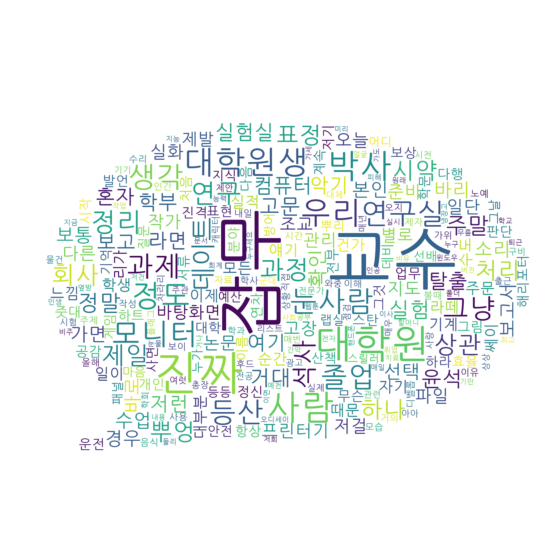

In [21]:
# 딕셔너리에 저장된 데이터는 generate_from_frequencies() 함수를 사용해서 워드클라우드를 만든다.
wordcloud = WordCloud(
    font_path='C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf',
    background_color='white',
    max_font_size=250,
    max_words=250,
    mask=mask
).generate_from_frequencies(data)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()